In [1]:
import pandas as pd

trades = pd.read_csv("historical_data.csv")
sentiment = pd.read_csv("fear_greed_index.csv")

In [2]:
trades.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [3]:
sentiment.head()

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [4]:
trades.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224 non-null  float64
 8   Direction         211224 non-null  object 
 9   Closed PnL        211224 non-null  float64
 10  Transaction Hash  211224 non-null  object 
 11  Order ID          211224 non-null  int64  
 12  Crossed           211224 non-null  bool   
 13  Fee               211224 non-null  float64
 14  Trade ID          211224 non-null  float64
 15  Timestamp         211224 non-null  float64
dtypes: bool(1), float64(

In [5]:
sentiment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   timestamp       2644 non-null   int64 
 1   value           2644 non-null   int64 
 2   classification  2644 non-null   object
 3   date            2644 non-null   object
dtypes: int64(2), object(2)
memory usage: 82.8+ KB


In [6]:
trades.isnull().sum()

Account             0
Coin                0
Execution Price     0
Size Tokens         0
Size USD            0
Side                0
Timestamp IST       0
Start Position      0
Direction           0
Closed PnL          0
Transaction Hash    0
Order ID            0
Crossed             0
Fee                 0
Trade ID            0
Timestamp           0
dtype: int64

In [7]:
sentiment.isnull().sum()

timestamp         0
value             0
classification    0
date              0
dtype: int64

In [8]:
trades.duplicated().sum()

np.int64(0)

In [9]:
trades = trades.drop_duplicates()

In [10]:
trades['date'] = pd.to_datetime(trades['Timestamp IST'], dayfirst=True).dt.date

In [11]:
sentiment['date'] = pd.to_datetime(sentiment['date']).dt.date

In [12]:
df = pd.merge(trades, sentiment, on='date', how='left')

In [13]:
df[['date','classification']].head()

,date,classification
0,2024-12-02,Extreme Greed
1,2024-12-02,Extreme Greed
2,2024-12-02,Extreme Greed
3,2024-12-02,Extreme Greed
4,2024-12-02,Extreme Greed


In [14]:
df[['date','classification']].tail()

,date,classification
211219,2025-04-25,Greed
211220,2025-04-25,Greed
211221,2025-04-25,Greed
211222,2025-04-25,Greed
211223,2025-04-25,Greed


In [17]:
df.columns

Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'Timestamp', 'date', 'timestamp', 'value', 'classification'],
      dtype='object')

In [18]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [19]:
df.columns

Index(['account', 'coin', 'execution_price', 'size_tokens', 'size_usd', 'side',
       'timestamp_ist', 'start_position', 'direction', 'closed_pnl',
       'transaction_hash', 'order_id', 'crossed', 'fee', 'trade_id',
       'timestamp', 'date', 'timestamp', 'value', 'classification'],
      dtype='object')

In [20]:
df['closed_pnl'].describe()

count    211224.000000
mean         48.749001
std         919.164828
min     -117990.104100
25%           0.000000
50%           0.000000
75%           5.792797
max      135329.090100
Name: closed_pnl, dtype: float64

In [21]:
df['win'] = df['closed_pnl'] > 0

In [25]:
df['classification'].isnull().sum()

np.int64(6)

In [26]:
df = df.dropna(subset=['classification'])

In [28]:
df.loc[:, 'sentiment'] = df['classification'].apply(
    lambda x: 'Fear' if 'Fear' in x else 'Greed'
)

In [29]:
df.groupby('sentiment')['closed_pnl'].mean()

sentiment
Fear     49.212077
Greed    48.118246
Name: closed_pnl, dtype: float64

In [30]:
df.groupby('sentiment')['win'].mean()

sentiment
Fear     0.407871
Greed    0.413444
Name: win, dtype: float64

In [31]:
df.groupby('sentiment')['size_usd'].mean()

sentiment
Fear     7182.011019
Greed    4635.764077
Name: size_usd, dtype: float64

In [32]:
df.groupby('sentiment').size()

sentiment
Fear      83237
Greed    127981
dtype: int64

In [33]:
pd.crosstab(df['sentiment'], df['side'])

side,BUY,SELL
sentiment,,
Fear,41205,42032
Greed,61485,66496


In [34]:
import matplotlib.pyplot as plt

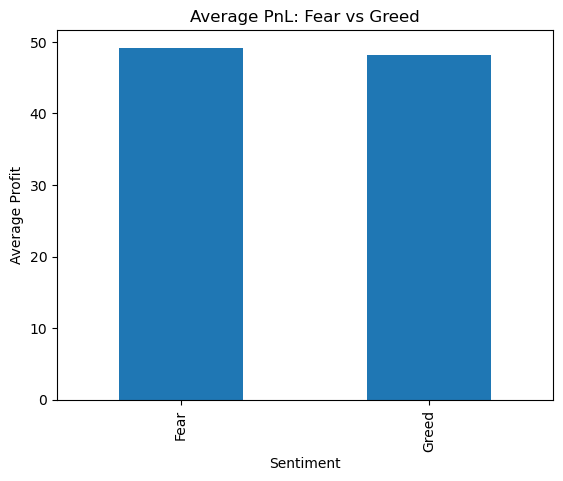

In [36]:
df.groupby('sentiment')['closed_pnl'].mean().plot(kind='bar')
plt.title("Average PnL: Fear vs Greed")
plt.xlabel("Sentiment")
plt.ylabel("Average Profit")
plt.show()

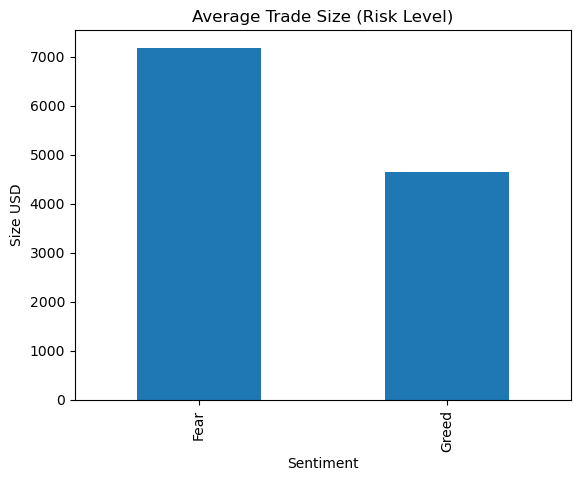

In [37]:
df.groupby('sentiment')['size_usd'].mean().plot(kind='bar')
plt.title("Average Trade Size (Risk Level)")
plt.xlabel("Sentiment")
plt.ylabel("Size USD")
plt.show()

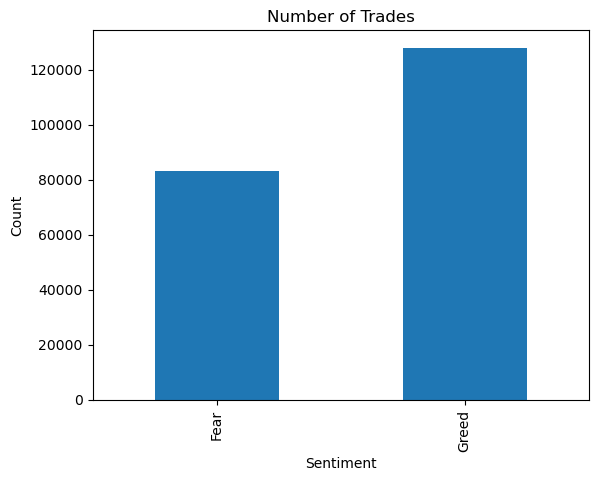

In [38]:
df.groupby('sentiment').size().plot(kind='bar')
plt.title("Number of Trades")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

In [40]:
df.loc[:, 'size_group'] = df['size_usd'].apply(
    lambda x: 'High' if x > 1000 else 'Low'
)

In [41]:
df.groupby(['sentiment', 'size_group'])['closed_pnl'].mean()

sentiment  size_group
Fear       High          107.449139
           Low             4.900412
Greed      High          116.129593
           Low             7.630033
Name: closed_pnl, dtype: float64

In [42]:
df.groupby('sentiment')['closed_pnl'].min()

sentiment
Fear     -35681.74723
Greed   -117990.10410
Name: closed_pnl, dtype: float64